<a href="https://colab.research.google.com/github/IlyaSemenovGD/TensorFlow2_0_Udemy/blob/main/Udemy_TF2_0_Course_5_Classify_Online_Text_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_alexa = pd.read_csv('drive/MyDrive/Udemy_TF2_course/amazon_alexa.tsv', delimiter='\t')

In [7]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [11]:
positive = df_alexa[df_alexa['feedback']==1]

In [12]:
negative = df_alexa[df_alexa['feedback']==0]

<Axes: xlabel='feedback', ylabel='count'>

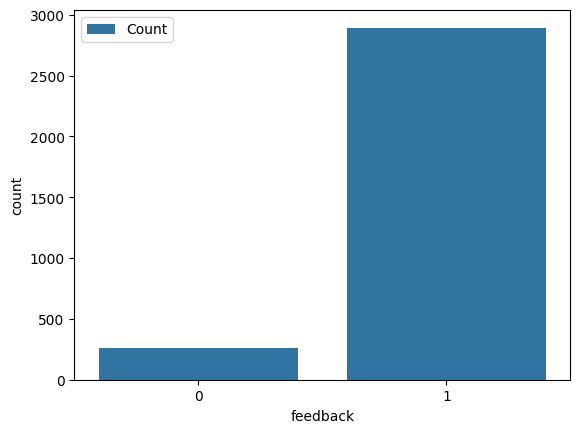

In [17]:
sns.countplot(x=df_alexa['feedback'], label = "Count")

<Axes: xlabel='rating', ylabel='count'>

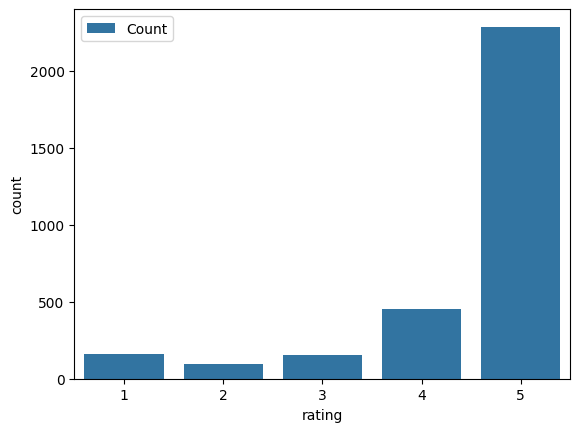

In [18]:
sns.countplot(x=df_alexa['rating'], label = "Count")

<Axes: >

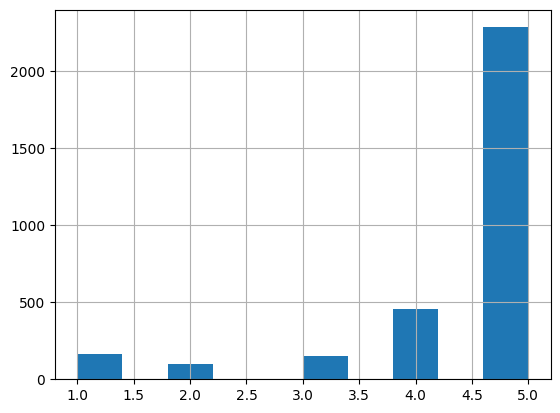

In [21]:
df_alexa['rating'].hist()

<ipython-input-23-42014144036b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='variation', y='rating', data=df_alexa, palette='deep')


<Axes: xlabel='variation', ylabel='rating'>

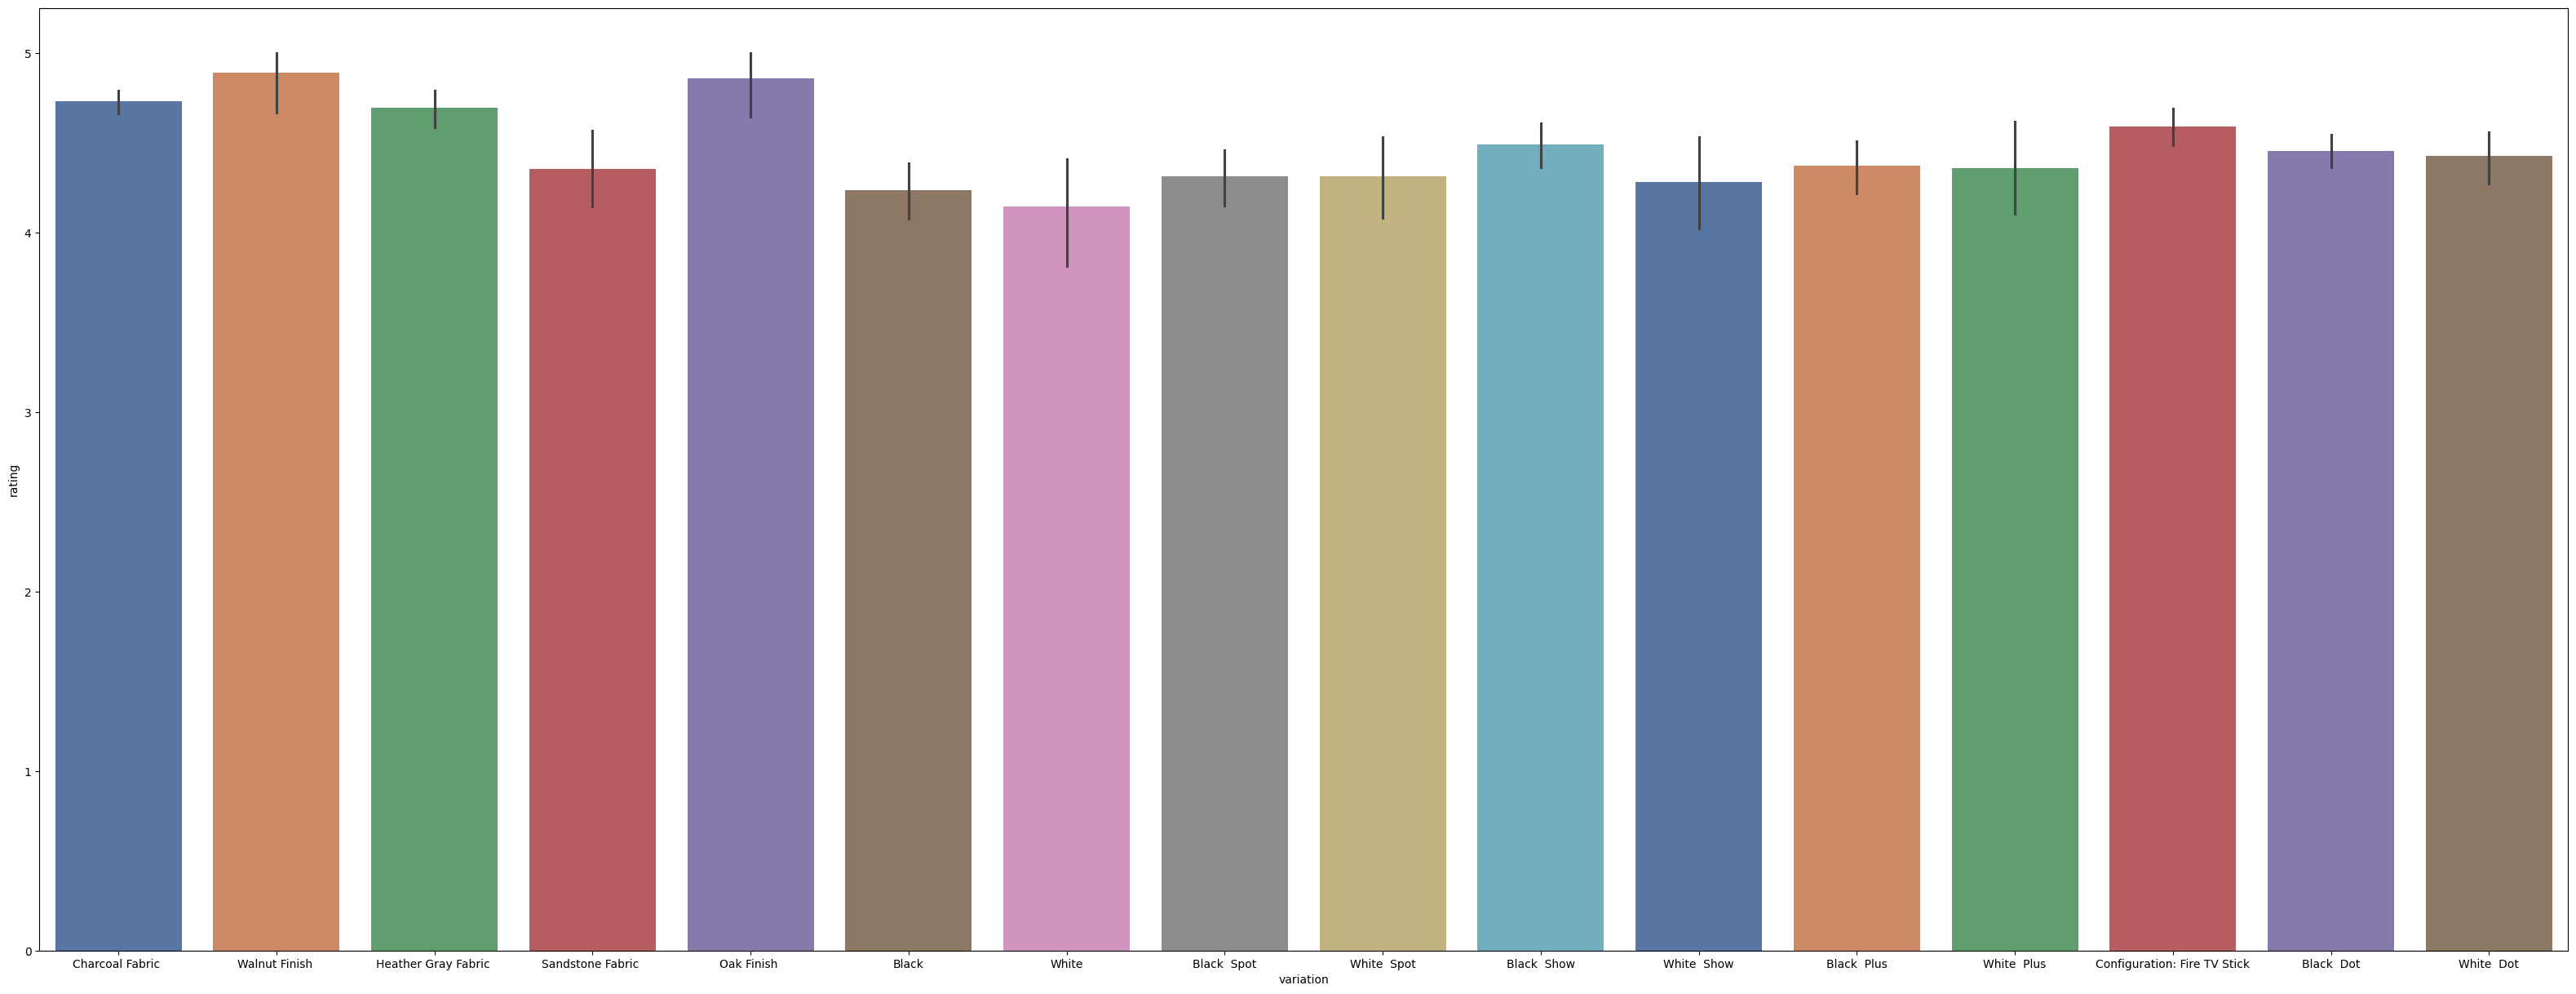

In [23]:
plt.figure(figsize = (40, 15))
sns.barplot(x='variation', y='rating', data=df_alexa, palette='deep')

In [25]:
df_alexa = df_alexa.drop(['date', 'rating'], axis=1)

In [26]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [30]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first=True, dtype='int')

In [31]:
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
df_alexa.drop(['variation'], axis=1, inplace=True)

In [34]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)

In [35]:
df_alexa.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [47]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [45]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [63]:
df_alexa = df_alexa.where(pd.notnull(df_alexa), 'NaN')

In [64]:
df_alexa[df_alexa['verified_reviews'] == 'NaN']

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
473,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
df_alexa.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [68]:
alexa_vectorizer = CountVectorizer()
alexa_count_vect = alexa_vectorizer.fit_transform(df_alexa['verified_reviews'])

In [69]:
alexa_count_vect.shape

(3150, 4045)

In [70]:
print(alexa_vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [72]:
print(alexa_count_vect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [73]:
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)

In [74]:
reviews=pd.DataFrame(alexa_count_vect.toarray())

In [75]:
df_alexa = pd.concat([df_alexa, reviews], axis=1)

In [76]:
df_alexa.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X = df_alexa.drop(['feedback'], axis=1)

In [78]:
y = df_alexa['feedback']

In [79]:
X.shape

(3150, 4060)

In [80]:
y.shape

(3150,)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [83]:
X_train.shape

(2520, 4060)

In [84]:
X_test.shape

(630, 4060)

In [85]:
y_train.shape

(2520,)

In [86]:
y_test.shape

(630,)

In [102]:
ANN_classifier = tf.keras.models.Sequential()

ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4060,)))
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
ANN_classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 400)                 │       1,624,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,785,201 (6.81 MB)

 Trainable params: 1,785,201 (6.81 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
ANN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
epochs_hist = ANN_classifier.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8843 - loss: 0.3742
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9617 - loss: 0.0995
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9881 - loss: 0.0369
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9964 - loss: 0.0141
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9948 - loss: 0.0126
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9946 - loss: 0.0148
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9947 - loss: 0.0157
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9943 - loss: 0.0104
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9954 - loss: 0.0133
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9940 - loss: 0.0147


In [107]:
y_pred_train = ANN_classifier.predict(X_train)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [108]:
y_pred_train = (y_pred_train > .5)
y_pred_train

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

<Axes: >

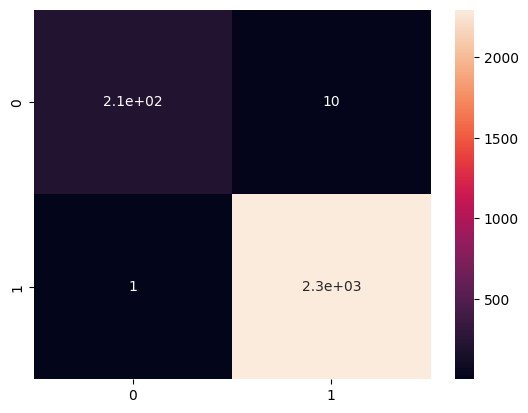

In [110]:
sns.heatmap(cm, annot=True)

In [112]:
y_pred_test = ANN_classifier.predict(X_test)
y_pred_test = (y_pred_test > .5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


<Axes: >

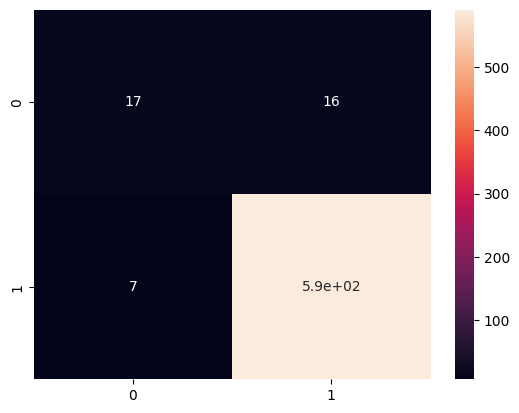

In [113]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

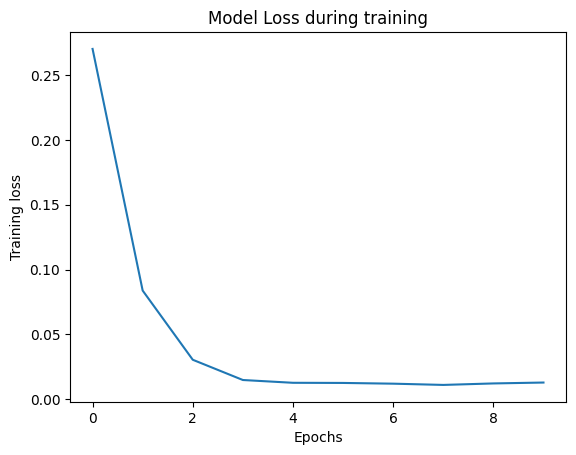

In [114]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

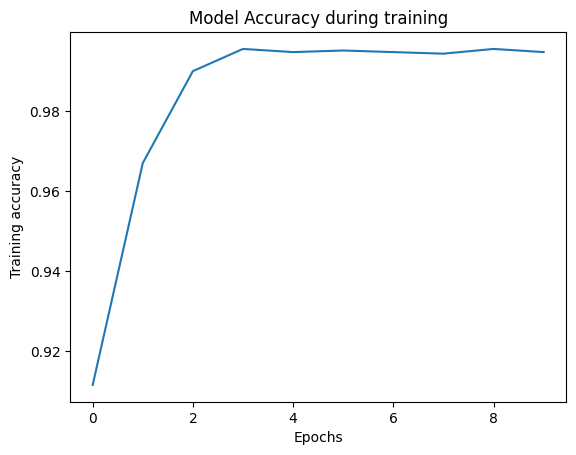

In [116]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy during training')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')
plt.show()